# Speed Networking Pairing Problem:
My wife is hosting a speed networking event on belhalf of her employer. For this event, there is availability for 20 participants. These **20 participants** will form **10 groups of 2** and spend ~5 minutes in each group. Once the time limit expires, the participants will then form another 10 groups of 2 for the following 5 minutes. This process will repeat until every participant has a ~5 minute networking session with **Every** other participant. Since this is __*Speed* Networking__, two separate participants can only join **one** group together throughout the entire process. To clarify, no two participants will meet twice.

### Goal:
Make a simple method to form these groups where there is a logical flow between each cycle

In [72]:
import numpy as np
from plotly.offline import iplot
from plotly.graph_objects import *

### Notes:<br>This is a combinatorics problem.

Let each participant be defined as a unique member of the set of postitive integers $[1,20].$<br>
The full set of `groups` are defined as $All\ Groups$
$$ All\ Groups={1,\ 2,\ 3,\ ...,\ 18,\ 19,\ 20  \choose 2}$$

The library itertools has a combinations subclass to simplify the process. This will return the full unique set of groupings that will be used throughout the Networking Event.

## Questions:
- How many total groups are there throughout the networking event?
- How many `rounds` are needed for all 20 participants to network with everyone exactly **once**
- What should the process that shifts rounds look like

### Notes:<br>This is a combinatorics problem.

Let each participant be defined as a unique member of the set of postitive integers $[1,20].$<br>
The full set of `groups` are defined as $All\ Groups$
$$ All\ Groups={1,\ 2,\ 3,\ ...,\ 18,\ 19,\ 20  \choose 2}$$

The library itertools has a combinations subclass to simplify the process. This will return the full unique set of groupings that will be used throughout the Networking Event.

## Questions:
- How many total groups are there throughout the networking event?
- How many `rounds` are needed for all 20 participants to network with everyone exactly **once**
- What should the process that shifts rounds look like

In [73]:
from itertools import combinations

In [74]:
pools = np.asarray(list(combinations(range(1,21),2)))

In [255]:
pools[:10]

array([[ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11]])

In [76]:
print (f"There are {pools.shape[0]} unique groupings throughout the Speed Networking Event")

There are 190 unique groupings throughout the Speed Networking Event


In [77]:
print (f"Since there are 20 participants, there are 10 groups of 2 participants.\nGiven that there are 190 total unique groups, then there must be {190/10} cycles necessary for everyone to meet once")

Since there are 20 participants, there are 10 groups of 2 participants.
Given that there are 190 total unique groups, then there must be 19.0 cycles necessary for everyone to meet once


### Summary:
- There are 190 total unique groups
- There are 19 cycles
- There are 10 groups of 2 each cycle

### Process:
- list the numbers in two rows: 1 - 10, 11 - 20
    - values at the same horizontal position make up each grouping
        ie: (1,10), (2,12), .... (10,20)
- fix one participant inplace, and rotate the rest clockwise one position
- find next grouings,
    ie: (1,12), (11,13), (2,10), ..., (9, 10)
- repeat for 19 cycles

In [130]:
start = np.arange(1,21)
print(start.reshape(2,10))

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]


In [274]:
def gen_pairings_list(lst):
    lst = np.asarray(lst)
    N = lst.shape[0]
    
    if N %2 != 0:
        raise(ValueError(f"Array lst is not even!\nLst has {N} values"))
    
    # reshape lst to 2,N/2 to generate pairings
    pairings = lst.reshape(2, N//2)
    
    # Transpose the pairings array to return an array of N/2 (10), 2
    return pairings.T


    
    
def cycle_list(lst, fixed_val=1):
    
    def reverse_half2(arr):
        # helper function to reverse order of second half of array in 1d array
        N = arr.shape[0]
        half_ind = N//2
        if N % 2 != 0:
            raise(ValueError(f"List lst is length {N}\n\tlst must be of even length!"))

        res = arr.copy() # copy array
        res[half_ind:] = arr[half_ind:][::-1] # reverse order of second half of values
        return res    
    
    lst = np.asarray(lst)
    N = lst.shape[0]
    # check for even length array and reverse second half of the array
    lst = reverse_half2(lst)

        
    res = np.zeros(N, dtype='int64') # create results array
    fv_ind = np.where(lst == fixed_val)[0][0] # get index of fixed value from lst
    
    # loop through lst and insert values to res at appropriate index
    for idx, val in enumerate(lst):
        fv_next_ind = (fv_ind + 1) % N # index after fixed value
        next_ind = (idx + 1) % N # find upcomming index
        
        if val == fixed_val:
            res[fv_ind] = fixed_val
        elif (idx + 1) % N == fv_ind:
            res[fv_next_ind] = val
        else:
            res[next_ind] = val
    res = reverse_half2(res) # reverse second half of results array
    return res

In [330]:
round_lists = dict()

for cycle in range(19):
    # initialize round_lists/pairings with start
    if cycle == 0:
        round_lists.update({cycle + 1 : start})
    else:
        # fill remaining round_lists with cycle_list of prior round list
        round_lists.update({cycle + 1 : cycle_list(round_lists[cycle])})
    # insert pairings to dict
round_pairings = {i:round_lists[i].reshape(2,10).T for i in range(1,20)}

In [358]:
from ipywidgets import widget, interact

In [359]:
from plotly.offline import iplot
from plotly.graph_objects import *

In [400]:
R = 1

def cycle_plot(R):
    
    data = round_pairings[R]
    
    return iplot({
        'data':[{'type':'scatter',
                'x': data[:,0],
                'y': data[:,1],
                'text':data,
                 'textposition':'top center',
                'opacity':0.5,
                'mode':'markers+lines+text'}],
        'layout':{'title':f"Speed Networkign Pairings:<br>Round #{R}",
                 'autosize':False,
                 'width':1000,
                 'height':700}
    })

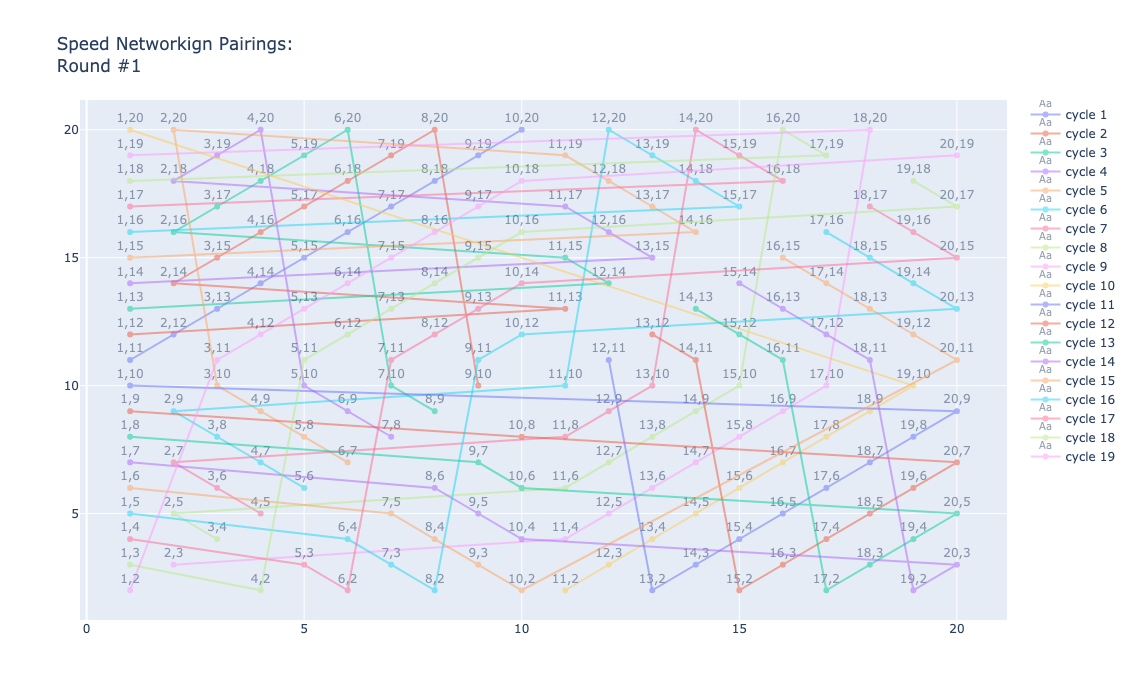

In [399]:
iplot({
    'data':[{'type':'scatter',
            'x': round_pairings[R][:,0],
            'y': round_pairings[R][:,1],
            'text':round_pairings[R],
             'textposition':'top center',
            'opacity':0.5,
            'mode':'markers+lines+text',
            'name':f'cycle {R}'} for R in range(1,20)],
    'layout':{'title':f"Speed Networkign Pairings:<br>Round #{R}",
             'autosize':False,
             'width':1000,
             'height':700}
})

In [379]:
def show_pairings(R):
    return round_pairings[R]

In [389]:
interact(show_pairings,R=(1,19,1))

interactive(children=(IntSlider(value=10, description='R', max=19, min=1), Output()), _dom_classes=('widget-in…

<function __main__.show_pairings(R)>

In [439]:
interact(cycle_plot, R=(1,19))

interactive(children=(IntSlider(value=10, description='R', max=19, min=1), Output()), _dom_classes=('widget-in…

<function __main__.cycle_plot(R)>

In [445]:
np.where(round_pairings[18] == 2)

(array([1]), array([1]))